In [1]:
import pandas as pd
import numpy as np
import sqlite3
import os
import re
import string
import gzip
import shutil
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/rm1667/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [58]:
conn = sqlite3.connect("Email/emails_22.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM emails")
results = cursor.fetchall()

In [59]:
emails_data = pd.DataFrame(results, columns=['Name', 'Email', 'Subject', 'Date', 'Year', 'Month', 'Day', 
                                             'Hour', 'Minute', 'Domain', 'Body', 'Party', 'Disclaimer'])
emails_data

,Name,Email,Subject,Date,Year,Month,Day,Hour,Minute,Domain,Body,Party,Disclaimer
0,Senator Ted Cruz,info@makingamericathegreatest.com,Biden Impeachment,2023-09-01T22:45:28Z,2023,9,1,22,45,makingamericathegreatest.com,NRSC Hunter Biden has no marketable skills. No...,R,TRUE
1,Urgent Communications [via Team Marsha],news@e.americanbriefing.com,They're trying,2023-09-02T10:03:30Z,2023,9,2,10,3,e.americanbriefing.com,Look - time is of the essence. ...,R,TRUE
2,Newt Gingrich,action@redvalues2024.online,I'm beginning to worry about what's to come next.,2023-09-02T12:33:01Z,2023,9,2,12,33,redvalues2024.online,Join me in supporting State GOP! ...,NA,TRUE
3,Vivek Ramaswamy,info@makingamericathegreatest.com,Now Pence is joining the fray,2023-09-02T03:00:31Z,2023,9,2,3,0,makingamericathegreatest.com,Vivek 2024 It’s clear that the establishment i...,R,TRUE
4,Ron DeSantis,email@updates.conservativeintel.com,"Hi, friend. This is my story.",2023-09-01T23:37:33Z,2023,9,1,23,37,updates.conservativeintel.com,http://paracom.paramountcommunication.com/p/vW...,R,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186613,Donald J. Trump,mail@swampdrainer.co,TRULY DISGRACEFUL,2023-08-03T23:02:44Z,2023,8,3,23,2,swampdrainer.co,Adding insult to injury. . . ...,NA,TRUE
186614,Donald J. Trump,mail@swampdrainer.co,TRULY DISGRACEFUL,2023-08-03T20:02:36Z,2023,8,3,20,2,swampdrainer.co,Adding insult to injury. . . ...,NA,TRUE
186615,Sean Patrick Maloney,info@seanmaloney.com,Republican fundraiser BACKFIRES,2022-09-12T18:04:48Z,2022,9,12,18,4,seanmaloney.com,"Derek, I can’t believe what I just learned: --...",D,TRUE
186616,Response Urgently Requested ----------- House GOP,news@e.americanactionnews.com,Our petition is going VIRAL: Dismiss ALL charg...,2023-08-17T18:07:33Z,2023,8,17,18,7,e.americanactionnews.com,Our new petition is going VIRAL͏ ͏ ͏ ͏ ͏ ...,R,TRUE


In [60]:
emails_data.to_csv('Email/emails_data_raw.csv', index=False)

In [61]:
# total count of emails

emails_data.shape[0]

186618

In [7]:
emails_2022 = emails_data[emails_data['Year'] == '2022']

In [8]:
# total count of emails in 2022

print("Emails of 2022: ", emails_2022.shape[0])

Emails of 2022:  80100


In [9]:
emails_2022.describe()

,Name,Email,Subject,Date,Year,Month,Day,Hour,Minute,Domain,Body,Party,Disclaimer
count,80100,80100,80100,80100,80100,80100,80100,80100,80100,80100,80100,80100,80100
unique,14180,1241,62269,79749,1,12,31,24,60,1008,76019,3,1
top,Herschel Walker,info@e.protectvoting.org,I’m,2022-11-05T21:01:59Z,2022,10,30,22,1,e.protectvoting.org,NRSC Official 2022 GOP Voter Census For: dpwil...,D,TRUE
freq,1812,1579,159,3,80100,10989,3464,6851,4988,1579,26,47448,80100


#### Most Mails by person

In [10]:
# most mails belongs to
most_emails = emails_2022['Name'].value_counts().head()
most_emails

Herschel Walker    1812
Donald J. Trump     812
Tim Ryan            588
Val Demings         533
Nancy Pelosi        502
Name: Name, dtype: int64

Text(0.5, 1.0, 'Distribution of Emails by Person')

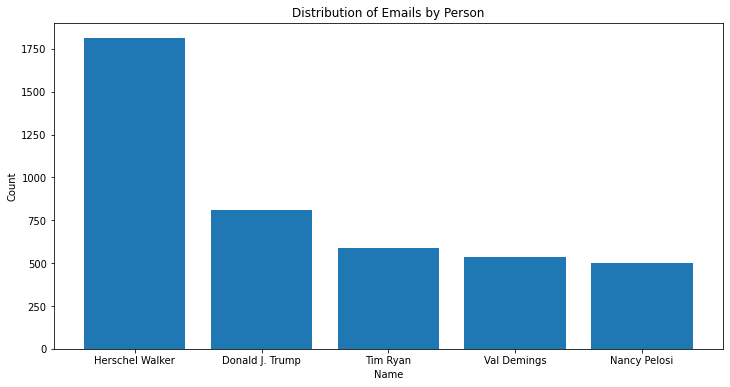

In [11]:
plt.figure(figsize=(12,6))
plt.bar(most_emails.index, most_emails.values)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Distribution of Emails by Person')

#### Distribution of data by Party

In [12]:
# distribution of emails according to party
party_counts = emails_2022.groupby('Party')['Party'].count()
party_counts

Party
D     47448
NA     5168
R     27484
Name: Party, dtype: int64

Text(0.5, 1.0, 'Distribution of Emails by Party')

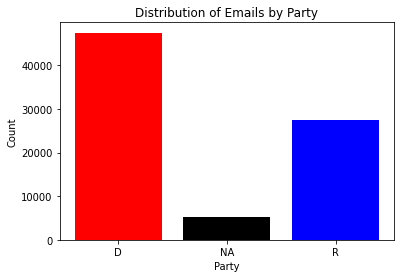

In [13]:
colors = ['red', 'black', 'blue']


plt.bar(party_counts.index, party_counts.values, color=colors)
# Add labels and title
plt.xlabel('Party')
plt.ylabel('Count')
plt.title('Distribution of Emails by Party')

In [44]:
# emails by month
emails_by_month = emails_2022['Month'].value_counts()
emails_by_month

10    10989
9      8736
8      7939
7      7084
6      6897
11     6457
5      6347
3      5943
4      5682
2      5617
1      5531
12     2878
Name: Month, dtype: int64

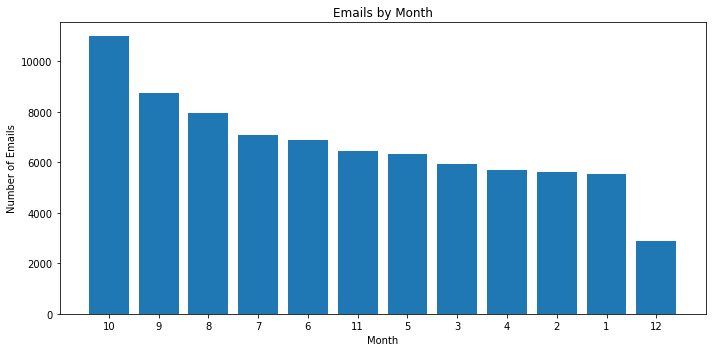

In [130]:
months = list(emails_by_month.index)
emails_count = list(emails_by_month.values)

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(months)), emails_count)

# Set x-axis tick labels
plt.xticks(range(len(months)), months)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Emails")
plt.title("Emails by Month")

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
# top domain
emails_by_domain = emails_2022['Domain'].value_counts().head()
emails_by_domain

e.protectvoting.org     1579
valdemings.com          1490
maggiehassan.com        1077
hmpac.com               1069
win.donaldjtrump.com    1056
Name: Domain, dtype: int64

### TV Data

In [2]:
Tv_data = pd.read_csv('TV/combined-archive-cc-2022.csv', encoding='utf-8')

/projects/community/py-data-science-stack/5.1.0/kp807/envs/fastai/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (0,7,10,11,13,27,35,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
Tv_data.shape

(917221, 56)

In [4]:
Tv_data.columns

Index(['REMOVE_TAG', 'access-restricted-item', 'addeddate', 'aspect_ratio',
       'audio_codec', 'audio_sample_rate', 'backup_location', 'ccllection',
       'ccnum', 'closed_captioning', 'colection', 'collecrtion', 'collection',
       'collections', 'color', 'contributor', 'curation', 'date',
       'description', 'frames_per_second', 'identifier', 'identifier-access',
       'imagecount', 'language', 'mediatype', 'nonideal', 'notes', 'ollection',
       'program', 'publicdate', 'rating', 'runtime', 'scandate', 'scanner',
       'scanningcenter', 'shiptracking', 'sound', 'source',
       'source_pixel_height', 'source_pixel_width', 'sponsor',
       'start_localtime', 'start_time', 'stop_time', 'subject', 'thumbs',
       'times', 'title', 'tuner', 'updatedate', 'updater', 'uploader',
       'utc_offset', 'video_codec', 'year', 'text'],
      dtype='object')

In [7]:
# filtering out required columns 

required_cols = ['addeddate', 'contributor', 'description', 'program','tuner', 'text']
Tv_data_raw = Tv_data[required_cols]

In [8]:
# filtering out required broadcaster

values_to_filter = ["b'RT'", "b'MSNBCW'", "b'CNNW'", "b'FOXNEWSW'", "b'BBCNEWS'"]
Tv_data_raw = Tv_data_raw[Tv_data_raw['contributor'].isin(values_to_filter)]

In [54]:
# filtering out data other than 2022

Tv_data_raw['Year'] = Tv_data_raw['addeddate'].apply(lambda x: pd.to_datetime(x.strip("b'")).year)
Tv_data_2022 = Tv_data_raw[Tv_data_raw['Year'] == 2022]

In [75]:
Tv_data_2022 = Tv_data_2022.drop(columns='Year')
Tv_data_2022

,addeddate,contributor,description,program,tuner,text
40071,2022-02-02 08:00:00,MSNBCW,"""Chris Hayes reports on some of the biggest ne...",All In With Chris Hayes,Virtual Ch. 787,"tonight on all in. >> they know it\'s true, th..."
41323,2022-01-02 00:30:00,RT,"""Markets! Finance! Scandal! Keiser Report i...",Keiser Report,Channel IPTV,"""ah ah whoa, happy new year special kaiser rep..."
41324,2022-01-06 13:30:00,RT,Former First Minister of Scotland Alex Salmond...,The Alex Salmond Show,Channel IPTV,"""ah, for june . welcome to the alexander. so i..."
41325,2022-01-14 05:00:00,RT,"RT news, interviews and shows available as pod...",News,Channel IPTV,"""ah ah, his royal highness, no more. queen eli..."
41326,2022-01-16 17:00:00,RT,"RT news, interviews and shows available as pod...",News,Channel IPTV,"""ah, with tennis superstar new york of h is de..."
...,...,...,...,...,...,...
917119,2022-05-13 03:00:00,FOXNEWSW,Greg Gutfeld examines the news of the day thro...,Gutfeld!,Virtual Ch. 760,who bought them? >> they sent them an email. >...
917201,2022-10-27 00:30:00,RT,"""RT's documentaries give a varied and unique v...",Documentary,Channel IPTV,"""have any quality for russians, all we gotta d..."
917204,2022-10-26 17:30:00,RT,"""RT's documentaries give a varied and unique v...",Documentary,Channel IPTV,"""ah ah a ah with. ringback ringback ah, becaus..."
917210,2022-10-19 05:00:00,FOXNEWSW,Powerful analysis and spirited debates with gu...,Tucker Carlson Tonight,Virtual Ch. 760,""">> they willw em. they fought for us .sn no't..."


In [77]:
for i in Tv_data_2022.columns:
    Tv_data_2022[i] = Tv_data_2022[i].str.strip("b'")

In [80]:
Tv_data_2022

,addeddate,contributor,description,program,tuner,text
40071,2022-02-02 08:00:00,MSNBCW,"""Chris Hayes reports on some of the biggest ne...",All In With Chris Hayes,Virtual Ch. 787,"tonight on all in. >> they know it\'s true, th..."
41323,2022-01-02 00:30:00,RT,"""Markets! Finance! Scandal! Keiser Report i...",Keiser Report,Channel IPTV,"""ah ah whoa, happy new year special kaiser rep..."
41324,2022-01-06 13:30:00,RT,Former First Minister of Scotland Alex Salmond...,The Alex Salmond Show,Channel IPTV,"""ah, for june . welcome to the alexander. so i..."
41325,2022-01-14 05:00:00,RT,"RT news, interviews and shows available as pod...",News,Channel IPTV,"""ah ah, his royal highness, no more. queen eli..."
41326,2022-01-16 17:00:00,RT,"RT news, interviews and shows available as pod...",News,Channel IPTV,"""ah, with tennis superstar new york of h is de..."
...,...,...,...,...,...,...
917119,2022-05-13 03:00:00,FOXNEWSW,Greg Gutfeld examines the news of the day thro...,Gutfeld!,Virtual Ch. 760,who bought them? >> they sent them an email. >...
917201,2022-10-27 00:30:00,RT,"""RT's documentaries give a varied and unique v...",Documentary,Channel IPTV,"""have any quality for russians, all we gotta d..."
917204,2022-10-26 17:30:00,RT,"""RT's documentaries give a varied and unique v...",Documentary,Channel IPTV,"""ah ah a ah with. ringback ringback ah, becaus..."
917210,2022-10-19 05:00:00,FOXNEWSW,Powerful analysis and spirited debates with gu...,Tucker Carlson Tonight,Virtual Ch. 760,""">> they willw em. they fought for us .sn no't..."


In [81]:
Tv_data_2022.to_csv('TV/tv_data_raw_2022.csv', index=False)

In [85]:
Tv_data_2022['Month'] = Tv_data_2022['addeddate'].apply(lambda x: pd.to_datetime(x).month)

In [89]:
TV_data_by_month = Tv_data_2022['Month'].value_counts()
TV_data_by_month

1     4620
5     4543
8     4533
7     4449
4     4437
6     4346
9     4206
3     4154
2     4084
10    3912
Name: Month, dtype: int64

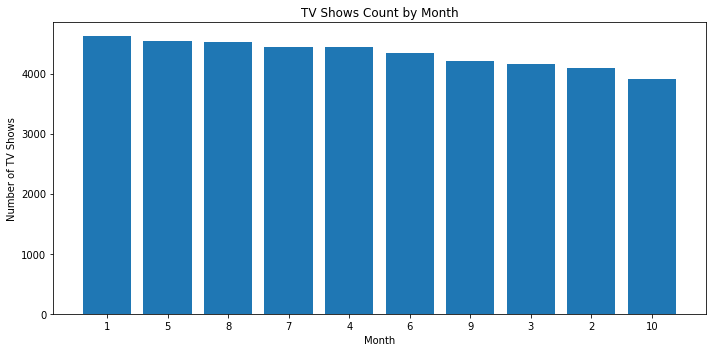

In [91]:
months = list(TV_data_by_month.index)
tvshows_count = list(TV_data_by_month.values)

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(months)), tvshows_count)

# Set x-axis tick labels
plt.xticks(range(len(months)), months)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of TV Shows")
plt.title("TV Shows Count by Month")

# Show the plot
plt.tight_layout()
plt.show()

In [95]:
TV_data_by_broadcaster = Tv_data_2022['contributor'].value_counts()
TV_data_by_broadcaster

RT          13985
BBCNEWS      9888
CNNW         7042
MSNBCW       6253
FOXNEWSW     6116
Name: contributor, dtype: int64

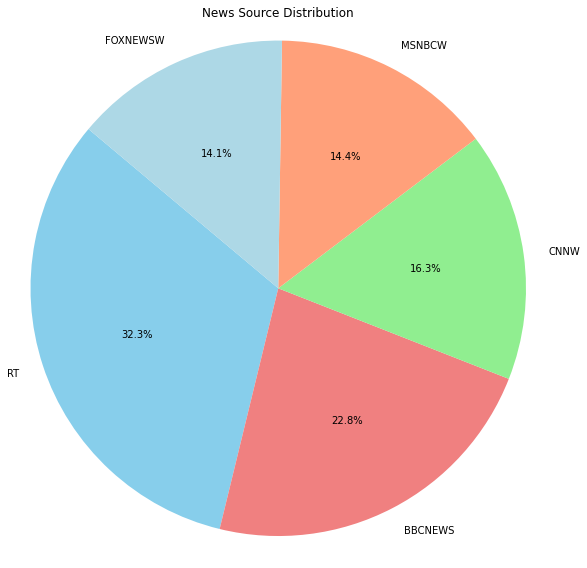

In [96]:
# Create a pie chart
categories = TV_data_by_broadcaster.index
counts = TV_data_by_broadcaster.values

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue'])
plt.axis('equal')

# Add a title
plt.title('News Source Distribution')

# Show the plot
plt.tight_layout()
plt.show()

## Podcast Data

In [25]:
# curr_dir = os.getcwd()
# work_dir = curr_dir + '/Podcast'

# # Filter out 2022 data
# target_string = '2022'

# # Initialize counters for .txt files
# txt_file_count = 0
# deleted_file_count = 0

# for foldername, subfolders, filenames in os.walk(work_dir):
#     for filename in filenames:
#         if filename.endswith('.txt') and target_string not in filename:
#             file_path = os.path.join(foldername, filename)
#             os.remove(file_path)
#             deleted_file_count += 1
#         elif filename.endswith('.txt'):
#             txt_file_count += 1

# print(f"Total .txt files remaining: {txt_file_count}")
# print(f"Total .txt files deleted: {deleted_file_count}")

In [63]:
curr_dir = os.getcwd()
work_dir = curr_dir + '/Podcast'

In [64]:
directory_counts = []

for directory_name, _, files in os.walk(work_dir):
    txt_file_count = sum(1 for file in files if file.endswith('.txt'))
    
    # Extract only the folder name from the directory path
    folder_name = os.path.basename(directory_name)
    
    # Append the directory and count to the list only if count is not 0
    if txt_file_count != 0:
        directory_counts.append((folder_name, txt_file_count))

sorted_directory_counts = sorted(directory_counts, key=lambda x: x[1], reverse=True)

df = pd.DataFrame(sorted_directory_counts, columns=["Podcast", "Episodes"])
df

,Podcast,Episodes
0,The_Sean_Hannity_Show,698
1,Bill_O_Reilly_s_No_Spin_News_and_Analysis,670
2,The_Glenn_Beck_Program,509
3,Bannon_s_War_Room,508
4,The_Dan_Bongino_Show,321
5,Mark_Levin_Podcast,317
6,The_Michael_Knowles_Show,315
7,The_Ben_Shapiro_Show,292
8,The_Matt_Walsh_Show,286
9,Human_Events_Daily_with_Jack_Posobiec,279


In [65]:
data = []

for directory_name, _, files in os.walk(work_dir):
    for filename in files:
        if filename.endswith(".txt"):
            folder_name = os.path.basename(directory_name)
            
            # Extract date from the file name
            date_part_str = filename.split("_")
            date_list = date_part_str[-2].split("-")[1:]
            part_str = date_part_str[-1].split(".")[0]
            
            # Convert the list elements to integers
            year, month, day = map(int, date_list)

            # Create a datetime object
            podcast_date = datetime(year, month, day)
            podcast_part = int(part_str)

            # Read the contents of the file
            with open(os.path.join(directory_name, filename), 'r', encoding='utf-8') as file:
                transcript = file.read()

            # Append the data to the list
            data.append([folder_name, podcast_date, podcast_part, transcript])

In [ ]:
# Create a DataFrame from the collected data
podcast_df = pd.DataFrame(data, columns=["Podcast", "Date", "Part", "Transcript"])
podcast_df

In [81]:
podcast_df.to_csv('Podcast/podcast_data_raw.csv', index=False)

In [82]:
# !pip install --user wordcloud
# !pip install --user seaborn
# !pip install --user spellchecker

In [83]:
podcast_df = pd.read_csv('Podcast/podcast_data_raw.csv')

In [87]:
podcast_df['Date'] = pd.to_datetime(podcast_df['Date'])

In [91]:
podcast_df['Month'] = podcast_df['Date'].apply(lambda x: x.month)

In [122]:
podcasts_by_month = podcast_df['Month'].value_counts()
podcasts_by_month

9     663
11    661
10    659
8     646
12    601
3     577
6     575
7     563
5     537
4     502
1     492
2     473
Name: Month, dtype: int64

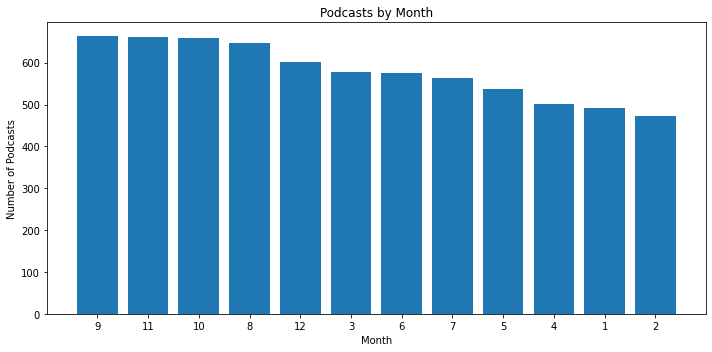

In [129]:
import matplotlib.pyplot as plt

# Sample data
months = list(podcasts_by_month.index)
podcasts_count = list(podcasts_by_month.values)

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(months)), podcasts_count)

# Set x-axis tick labels
plt.xticks(range(len(months)), months)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Podcasts")
plt.title("Podcasts by Month")

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
from wordcloud import WordCloud, STOPWORDS

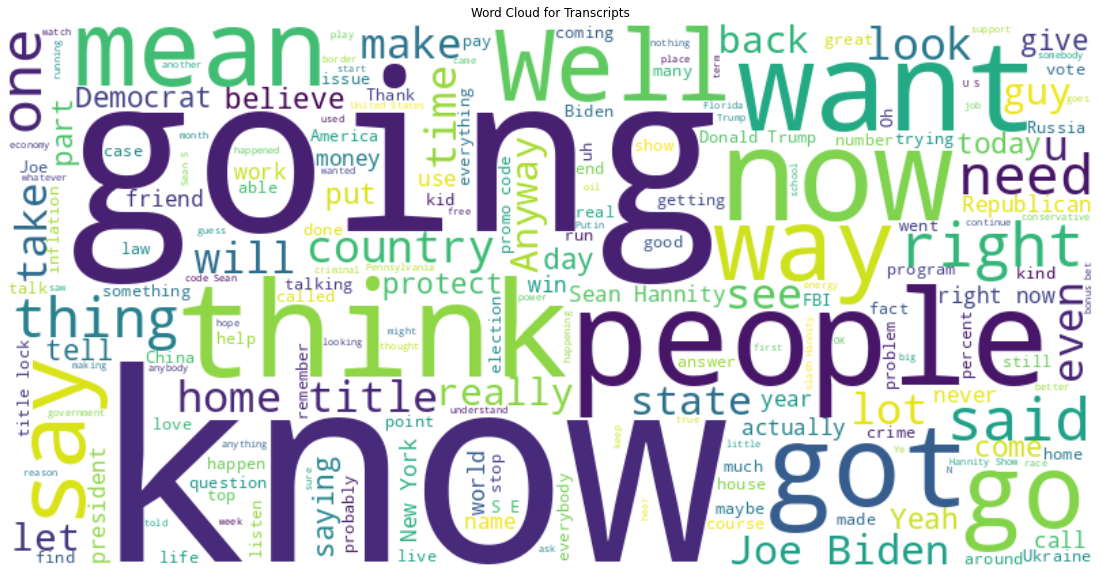

In [34]:
# Assuming your DataFrame is named 'df'
transcripts = podcast_df[podcast_df['Podcast'] == 'The_Sean_Hannity_Show']['Transcript'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400, background_color='white').generate(transcripts)

# Display the word cloud using Matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Transcripts')
plt.show()